In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import numpy as np

In [2]:
%matplotlib inline

In [3]:
sns.set(rc={'figure.figsize': (11.7, 8.27)}, style="white", color_codes=True)
plt.rc('pdf', fonttype=42)  # Embed font

In [4]:
class QACImpl : 
    htrie = 'HTrie'
    marisa = 'Marisa'
    dawg = 'DAWG'
    incngt = 'IncNgTrie'

    @staticmethod
    def qac_impl_list():
        return [QACImpl.htrie, QACImpl.marisa, QACImpl.dawg, QACImpl.incngt]

In [5]:
def map_qac_impl(s):
    for qimpl in QACImpl.qac_impl_list():
        if qimpl in s: 
            return qimpl

def read_membm_df(file_name, collection):
    mem_df = pd.read_csv(file_name)
    mem_df['collection'] = collection
    mem_df.sort_values(['QACImpl','nrows'], inplace=True)
    mem_df.QACImpl = mem_df.QACImpl.apply(lambda x: map_qac_impl(x))
    mem_df.rename(columns={'QACImpl':'qac_impl'}, inplace=True)
    mem_df['heap_frac'] = mem_df.heap_used/mem_df.BytesProcessed
    return mem_df

In [6]:
wiki_memdf = read_membm_df('../../export/data/mem-bm/wiki-1590211724-build-mem.csv', 'wiki')
cweb_memdf = read_membm_df('../../export/data/mem-bm/cweb-1590211760-build-mem.csv', 'cweb')
random_memdf = read_membm_df('../../export/data/mem-bm/random-1590327569-build-mem.csv', 'random')
bing_memdf = read_membm_df('../../export/data/mem-bm/bing-1590548765-build-mem.csv', 'bing')

In [7]:
combined_memdf = wiki_memdf.append(cweb_memdf, ignore_index=True)\
                           .append(random_memdf, ignore_index=True)\
                           .append(bing_memdf, ignore_index=True)


In [8]:
combined_memdf

,qac_impl,vm_used,rss_used,heap_used,heap_peak,heap_total,stack_used,nrows,BytesProcessed,collection,heap_frac
0,HTrie,0.0,0.0,17921.0,2.102000e+04,7.944000e+04,2880,512,12581,wiki,1.424450
1,HTrie,0.0,0.0,66644.0,7.021100e+04,3.211240e+05,56,2048,50126,wiki,1.329530
2,HTrie,0.0,0.0,286138.0,3.490890e+05,1.365770e+06,56,8192,200950,wiki,1.423926
3,HTrie,0.0,0.0,1034980.0,1.035290e+06,6.933170e+06,2712,32768,803765,wiki,1.287665
4,HTrie,0.0,0.0,4241380.0,4.246780e+06,2.280960e+07,2176,131072,3213061,wiki,1.320043
5,HTrie,0.0,0.0,16243400.0,1.625110e+07,1.092890e+08,2176,524288,12855042,wiki,1.263582
6,HTrie,69345300.0,67584000.0,63396200.0,6.349080e+07,4.385200e+08,2608,2097152,51455201,wiki,1.232066
7,HTrie,169841000.0,166527000.0,135791000.0,1.359530e+08,9.373720e+08,2496,4560698,111889582,wiki,1.213616
8,Marisa,0.0,348160.0,40432.0,8.238800e+04,3.766320e+05,5336,512,12581,wiki,3.213735
9,Marisa,0.0,0.0,123369.0,2.976720e+05,1.393060e+06,2864,2048,50126,wiki,2.461178


In [9]:
bytes_proc_min = combined_memdf.groupby(['collection'])['BytesProcessed'].agg('max').min()

# Fraction of heap used from different collections

In [10]:
qac_impl = 'Marisa'
sliced_df = combined_memdf[(combined_memdf.qac_impl==qac_impl) 
                           & (combined_memdf.BytesProcessed <= bytes_proc_min)]

In [11]:
combined_memdf.groupby(['collection'])['BytesProcessed'].agg('max')

collection
bing       317302759
cweb      1761898943
random     116450280
wiki       111889582
Name: BytesProcessed, dtype: int64

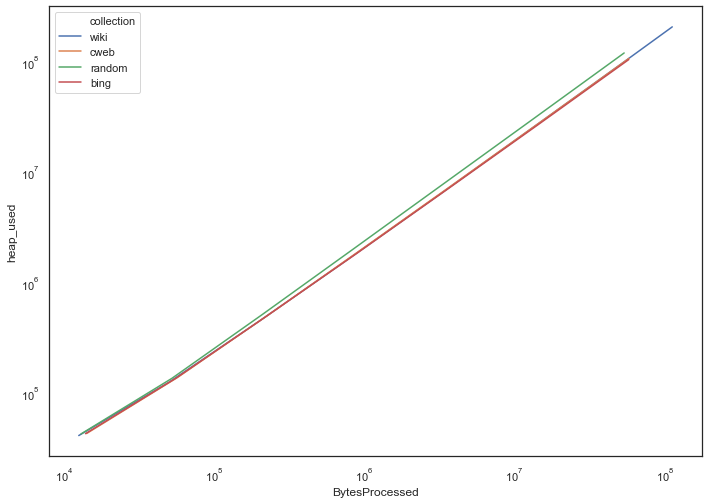

In [12]:
ax = sns.lineplot(x='BytesProcessed', y='heap_used', hue='collection', data=sliced_df)
ax.set_xscale('log')
ax.set_yscale('log')

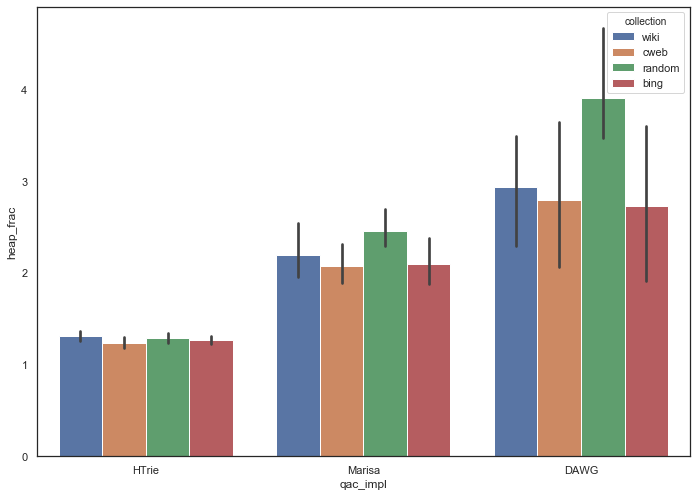

In [13]:
ax = sns.barplot(x='qac_impl', y='heap_frac', hue='collection', data=combined_memdf)


# Peak heap usage

In [29]:
heap_peak = combined_memdf.groupby(['qac_impl', 'collection'])['heap_peak'].agg('max').unstack().reset_index()

In [30]:
# heap_peak = heap_peak.T.reset_index()

In [31]:
#heap_peak.bing = heap_peak.bing/1024/1024/1024

In [32]:
# heap_peak.columns = ['collection', 'dawg', 'htrie', 'marisa']
heap_peak

collection,qac_impl,bing,cweb,random,wiki
0,DAWG,6.239860e+08,4.452760e+09,680545000.0,335642000.0
1,HTrie,3.761750e+08,1.882050e+09,134309000.0,135953000.0
2,Marisa,1.337740e+09,6.443940e+09,614799000.0,576836000.0


In [37]:
wiki_ls = 100609881
cweb_ls = 1540841968
random_ls = 105170578
bing_ls = 283273958

In [38]:
heap_peak['frac'] = heap_peak.bing/bing_ls

In [39]:
heap_peak

collection,qac_impl,bing,cweb,random,wiki,frac
0,DAWG,6.239860e+08,4.452760e+09,680545000.0,335642000.0,2.202765
1,HTrie,3.761750e+08,1.882050e+09,134309000.0,135953000.0,1.327955
2,Marisa,1.337740e+09,6.443940e+09,614799000.0,576836000.0,4.722425


In [21]:
heap_peak.cweb = heap_peak.cweb/1024/1024/1024
heap_peak.random = heap_peak.random/1024/1024/1024
heap_peak.wiki = heap_peak.wiki/1024/1024/1024

In [22]:
heap_peak

collection,qac_impl,bing,cweb,random,wiki,frac
0,DAWG,0.581132,4.146956,0.633807,0.312591,6.470869
1,HTrie,0.350340,1.752796,0.125085,0.126616,1.277059
2,Marisa,1.245867,6.001387,0.572576,0.537220,5.845732


In [23]:
135953000.0/1024/1024/1024

0.12661609798669815

In [28]:
3.025662e-08

3.025662e-08